<a href="https://colab.research.google.com/github/DIPANJAN001/Dipanjanpatra/blob/master/ReportPV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.7 MB/s 


In [3]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [4]:
df=pd.read_excel("/content/pv_02.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [5]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	15
R

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=141,
                                         random_state=RandomState(MT19937) at 0x7FDF5C0DDAF0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FDF5C0DDAF0, verbose=2)

In [6]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 3
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.4, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)

In [8]:
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

Epoch 1/200
46/46 [==============================] - 32s 158ms/step - loss: 0.0240 - root_mean_squared_error: 0.1548 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0543
Epoch 2/200
46/46 [==============================] - 2s 38ms/step - loss: 0.0116 - root_mean_squared_error: 0.1076 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0389
Epoch 3/200
46/46 [==============================] - 2s 37ms/step - loss: 0.0060 - root_mean_squared_error: 0.0777 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0400
Epoch 4/200
46/46 [==============================] - 2s 38ms/step - loss: 0.0058 - root_mean_squared_error: 0.0759 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0381
Epoch 5/200
46/46 [==============================] - 2s 38ms/step - loss: 0.0049 - root_mean_squared_error: 0.0699 - val_loss: 8.9940e-04 - val_root_mean_squared_error: 0.0300
Epoch 6/200
46/46 [==============================] - 2s 38ms/step - loss: 0.0043 - root_mean_squared_error: 0.0657 - val_loss: 0.0010 

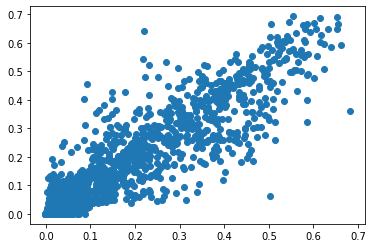

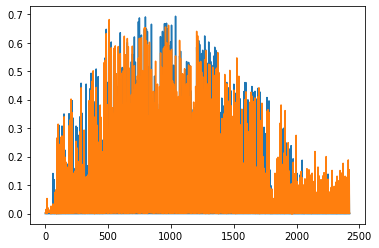

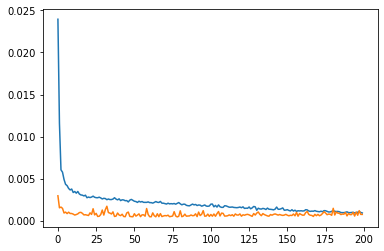

In [33]:
def get_model11(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(64, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model21(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(64, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.2)(fe2_0)
    fe2_2 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.2)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model31(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(64, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.2)(fe3_0)
    fe3_2 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.2)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model11() 
model2 = get_model21() 
model3 = get_model31()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model1 = Model(inputs=inputs1, outputs=outputs)
ensemble_model1.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history1=ensemble_model1.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size = 64)
y1=ensemble_model1.predict(X_test)
print(np.sqrt(mean_squared_error(y1,y_test)))
plt.scatter(y1,y_test)
plt.show()
df_1 = pd.DataFrame()
df_1['time']=[i for i in range(len(y1))]
df_1['Actual']=y_test
df_1['Predicted']=y1
import matplotlib.pyplot as plt
plt.plot(df_1['time'],df_1['Actual'])
plt.plot(df_1['time'],df_1['Predicted'])
plt.show()
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='val')


Epoch 1/200
46/46 [==============================] - 24s 56ms/step - loss: 0.0272 - root_mean_squared_error: 0.1649 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0869
Epoch 2/200
46/46 [==============================] - 1s 22ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0893
Epoch 3/200
46/46 [==============================] - 1s 23ms/step - loss: 0.0149 - root_mean_squared_error: 0.1220 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 4/200
46/46 [==============================] - 1s 22ms/step - loss: 0.0094 - root_mean_squared_error: 0.0972 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0460
Epoch 5/200
46/46 [==============================] - 1s 22ms/step - loss: 0.0083 - root_mean_squared_error: 0.0912 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0480
Epoch 6/200
46/46 [==============================] - 1s 30ms/step - loss: 0.0077 - root_mean_squared_error: 0.0875 - val_loss: 9.2525e-04 -

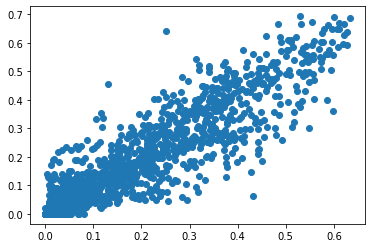

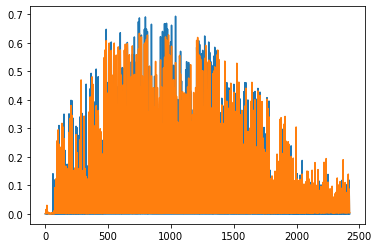

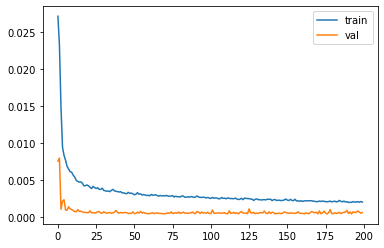

In [22]:
def get_model12(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = LSTM(32, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model22(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(32, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model32(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.7)(fe3_0)
    fe3_2 = LSTM(32, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.7)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model12() 
model2 = get_model22() 
model3 = get_model32()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model2 = Model(inputs=inputs1, outputs=outputs)
ensemble_model2.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history2=ensemble_model2.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size = 64)
y2=ensemble_model2.predict(X_test)
print(np.sqrt(mean_squared_error(y2,y_test)))
plt.scatter(y2,y_test)
plt.show()
df_2 = pd.DataFrame()
df_2['time']=[i for i in range(len(y2))]
df_2['Actual']=y_test
df_2['Predicted']=y2
import matplotlib.pyplot as plt
plt.plot(df_2['time'],df_2['Actual'])
plt.plot(df_2['time'],df_2['Predicted'])
plt.show()
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()
plt.show()


Epoch 1/200
46/46 [==============================] - 8s 30ms/step - loss: 0.0266 - root_mean_squared_error: 0.1632 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0780
Epoch 2/200
46/46 [==============================] - 1s 12ms/step - loss: 0.0244 - root_mean_squared_error: 0.1562 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0764
Epoch 3/200
46/46 [==============================] - 1s 11ms/step - loss: 0.0220 - root_mean_squared_error: 0.1483 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0484
Epoch 4/200
46/46 [==============================] - 1s 11ms/step - loss: 0.0160 - root_mean_squared_error: 0.1263 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 5/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0133 - root_mean_squared_error: 0.1152 - val_loss: 9.9812e-04 - val_root_mean_squared_error: 0.0316
Epoch 6/200
46/46 [==============================] - 0s 11ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - val_loss: 0.0010 - 

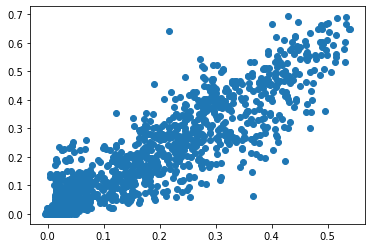

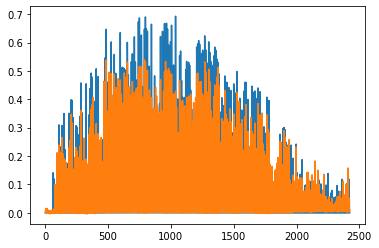

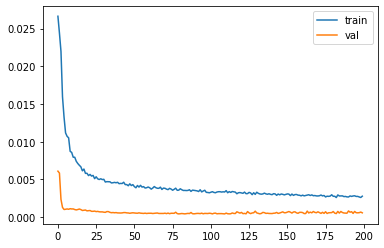

In [40]:
def get_model12(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(32, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.5)(fe1_0)
    fe1_2 = LSTM(16, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.5)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
'''def get_model11_(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(64, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.5)(fe1_0)
    fe1_2 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.5)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)'''
def get_model22(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(32, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(16, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
'''def get_model11(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(64, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)'''
model1 = get_model12() 
#model2 = get_model11_() 
model3 = get_model22()
#model4 = get_model11()
y1 = model1(inputs1) 
y2 = model3(inputs1) 
#y3 = model3(inputs1)
#y4 = model4(inputs1)
outputs = layers.average([y1, y2]) 
ensemble_model2 = Model(inputs=inputs1, outputs=outputs)
ensemble_model2.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history2=ensemble_model2.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size = 64)
y2=ensemble_model2.predict(X_test)
print(np.sqrt(mean_squared_error(y2,y_test)))
plt.scatter(y2,y_test)
plt.show()
df_2 = pd.DataFrame()
df_2['time']=[i for i in range(len(y2))]
df_2['Actual']=y_test
df_2['Predicted']=y2
import matplotlib.pyplot as plt
plt.plot(df_2['time'],df_2['Actual'])
plt.plot(df_2['time'],df_2['Predicted'])
plt.show()
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()
plt.show()


Epoch 1/200
46/46 [==============================] - 19s 60ms/step - loss: 0.0272 - root_mean_squared_error: 0.1651 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0802
Epoch 2/200
46/46 [==============================] - 1s 23ms/step - loss: 0.0220 - root_mean_squared_error: 0.1484 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1060
Epoch 3/200
46/46 [==============================] - 1s 23ms/step - loss: 0.0116 - root_mean_squared_error: 0.1077 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0401
Epoch 4/200
46/46 [==============================] - 1s 24ms/step - loss: 0.0091 - root_mean_squared_error: 0.0954 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 5/200
46/46 [==============================] - 1s 24ms/step - loss: 0.0082 - root_mean_squared_error: 0.0907 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0332
Epoch 6/200
46/46 [==============================] - 1s 23ms/step - loss: 0.0081 - root_mean_squared_error: 0.0898 - val_loss: 8.7006e-04 -

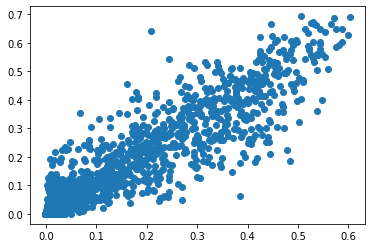

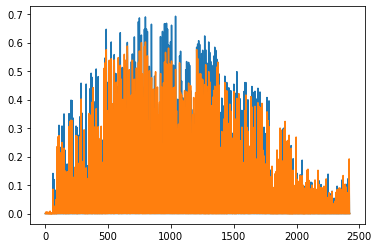

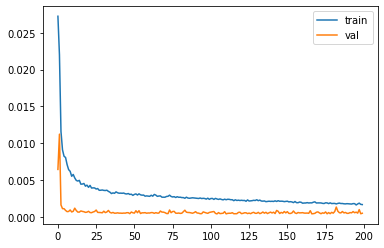

In [36]:
def get_model12(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = LSTM(32, activation='relu',return_sequences = True)(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=LSTM(8, activation='relu')(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model22(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = LSTM(32, activation='relu',return_sequences = True)(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=LSTM(8, activation='relu')(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model32(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.7)(fe3_0)
    fe3_2 = LSTM(32, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.7)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
def get_model42(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = LSTM(64, activation='relu',return_sequences = True)(inputs1)#16,8,8
    fe3_1 = Dropout(0.7)(fe3_0)
    fe3_2 = LSTM(32, activation='relu',return_sequences = True)(fe3_1)
    fe3_3= Dropout(0.7)(fe3_2)
    fe3_4=LSTM(8, activation='relu')(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model12() 
model2 = get_model22() 
model3 = get_model32()
model4 = get_model42()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
y4 = model4(inputs1)
outputs = layers.average([y1, y2, y3,y4]) 
ensemble_model2 = Model(inputs=inputs1, outputs=outputs)
ensemble_model2.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history2=ensemble_model2.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size = 64)
y2=ensemble_model2.predict(X_test)
print(np.sqrt(mean_squared_error(y2,y_test)))
plt.scatter(y2,y_test)
plt.show()
df_2 = pd.DataFrame()
df_2['time']=[i for i in range(len(y2))]
df_2['Actual']=y_test
df_2['Predicted']=y2
import matplotlib.pyplot as plt
plt.plot(df_2['time'],df_2['Actual'])
plt.plot(df_2['time'],df_2['Predicted'])
plt.show()
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()
plt.show()
